In [ ]:
from google.colab import files
files.upload()



Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"lavan06","key":"3248d7aa27dc9e68e14121b11959b3b5"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d aryansinghal10/alzheimers-multiclass-dataset-equal-and-augmented


!unzip alzheimers-multiclass-dataset-equal-and-augmented.zip



Streaming output truncated to the last 5000 lines.
  inflating: combined_images/VeryMildDemented/a231fefc-359b-40fc-b6aa-db4c3f3b51ac.jpg  
  inflating: combined_images/VeryMildDemented/a2479682-1520-4d4b-a819-0516809393db.jpg  
  inflating: combined_images/VeryMildDemented/a252d5dd-3e86-42c4-83bb-52031cf5b9ff.jpg  
  inflating: combined_images/VeryMildDemented/a2612e5a-c1f2-4781-803c-a6b471ded1b5.jpg  
  inflating: combined_images/VeryMildDemented/a261d715-f3f3-4e30-842a-2e5441f00955.jpg  
  inflating: combined_images/VeryMildDemented/a27aeaaf-b37f-4e15-ab3b-064daa19355b.jpg  
  inflating: combined_images/VeryMildDemented/a27da9a4-1ed4-493f-af81-dd8a3c8adda2.jpg  
  inflating: combined_images/VeryMildDemented/a280d3f6-c18d-424e-8f51-e924f5392c74.jpg  
  inflating: combined_images/VeryMildDemented/a28780ec-8fc0-4d55-9596-0ae2663c6da4.jpg  
  inflating: combined_images/VeryMildDemented/a293bcd0-b371-4120-a3b5-f8c763b0fa95.jpg  
  inflating: combined_images/VeryMildDemented/a296a0bd-4784

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
IMG_SIZE =224
BATCH_SIZE =32

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator = train_datagen.flow_from_directory('/content/combined_images',target_size=(IMG_SIZE,IMG_SIZE),batch_size=BATCH_SIZE,class_mode='categorical',subset='training')
val_generator = train_datagen.flow_from_directory('/content/combined_images',target_size=(IMG_SIZE,IMG_SIZE),batch_size=BATCH_SIZE,class_mode='categorical',subset='training')

Found 35200 images belonging to 4 classes.
Found 35200 images belonging to 4 classes.


In [ ]:
model = keras.Sequential([
 layers.Conv2D(32, (3, 3), activation='relu',input_shape=(IMG_SIZE, IMG_SIZE, 3)),layers.MaxPooling2D((2, 2)),
 layers.Conv2D(64, (3, 3), activation='relu'),layers.MaxPooling2D((2, 2)),
 layers.Conv2D(128, (3, 3), activation='relu'),layers.MaxPooling2D((2, 2)),
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(4, activation='softmax')])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
class_indices=train_generator.class_indices
class_names=list(class_indices.keys())
print(class_indices)
print(class_names)

{'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}
['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_generator, epochs=10, validation_data=val_generator)


Epoch 1/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 105s 90ms/step - accuracy: 0.5782 - loss: 0.9540 - val_accuracy: 0.8352 - val_loss: 0.4243
Epoch 2/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 97s 88ms/step - accuracy: 0.8607 - loss: 0.3435 - val_accuracy: 0.9201 - val_loss: 0.2045
Epoch 3/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 100s 91ms/step - accuracy: 0.9269 - loss: 0.1864 - val_accuracy: 0.9607 - val_loss: 0.1140
Epoch 4/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 102s 92ms/step - accuracy: 0.9524 - loss: 0.1219 - val_accuracy: 0.9733 - val_loss: 0.0835
Epoch 5/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 106s 96ms/step - accuracy: 0.9742 - loss: 0.0722 - val_accuracy: 0.9696 - val_loss: 0.0824
Epoch 6/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 138s 125ms/step - accuracy: 0.9806 - loss: 0.0561 - val_accuracy: 0.9877 - val_loss: 0.0397
Epoch 7/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 98s 89ms/step - accuracy: 0.9857 - loss: 0.0437 - val_accuracy: 0.9946 - val_loss: 0.0191
Epoch 8/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 136s 123ms/step - accuracy: 

In [ ]:
model.save('alzheimers.h5')


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model =load_model('alzheimers.h5')
print("Model Loaded")

Model Loaded


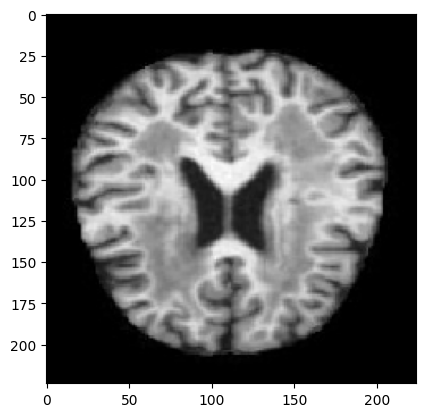

In [ ]:
test_image_path="/content/combined_images/NonDemented/00005576-2b76-44ca-8572-a5057201433f.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()


In [ ]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array /= 255
prediction=model.predict(img_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[2.3611602e-16 2.4538367e-35 9.9999988e-01 8.8587335e-08]]


In [ ]:
ind=np.argmax(prediction)
print(class_names[ind])

NonDemented
